In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_numeric_dtype
import warnings

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import BernoulliNB

from sklearn.feature_selection import RFE
import itertools
import os
warnings.filterwarnings('ignore')


In [10]:
import pandas as pd

file_path = "path_to_your_file.csv"  # Update with your file's path
df = pd.read_csv('D:\data.csv')

# Display the first few rows
print(df.head())

   CASE_NO_PATIENT'S  A1  A2  A3  A4  A5  A6  A7  A8  A9  ...  \
0                  1   0   0   0   0   0   0   1   1   0  ...   
1                  2   1   1   0   0   0   1   1   0   0  ...   
2                  3   1   0   0   0   0   0   1   1   0  ...   
3                  4   1   1   1   1   1   1   1   1   1  ...   
4                  5   1   1   0   1   1   1   1   1   1  ...   

   Global developmental delay/intellectual disability  \
0                                                Yes    
1                                                Yes    
2                                                Yes    
3                                                Yes    
4                                                Yes    

   Social/Behavioural Issues  Childhood Autism Rating Scale  Anxiety_disorder  \
0                        Yes                              1               Yes   
1                        Yes                              2               Yes   
2                      

In [11]:
print(df.shape)

df.info()
df.describe()

df.isna().sum()

df.dropna(inplace =True)
df.isna().sum()



(1985, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 28 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CASE_NO_PATIENT'S                                   1985 non-null   int64  
 1   A1                                                  1985 non-null   int64  
 2   A2                                                  1985 non-null   int64  
 3   A3                                                  1985 non-null   int64  
 4   A4                                                  1985 non-null   int64  
 5   A5                                                  1985 non-null   int64  
 6   A6                                                  1985 non-null   int64  
 7   A7                                                  1985 non-null   int64  
 8   A8                                                  1985 non-null  

CASE_NO_PATIENT'S                                     0
A1                                                    0
A2                                                    0
A3                                                    0
A4                                                    0
A5                                                    0
A6                                                    0
A7                                                    0
A8                                                    0
A9                                                    0
A10_Autism_Spectrum_Quotient                          0
Social_Responsiveness_Scale                           0
Age_Years                                             0
Qchat_10_Score                                        0
Speech Delay/Language Disorder                        0
Learning disorder                                     0
Genetic_Disorders                                     0
Depression                                      

In [12]:
print(df['Speech Delay/Language Disorder'].unique())
df['Speech Delay/Language Disorder'] = df['Speech Delay/Language Disorder'].map({'Yes': 1 ,'No': 0})


print(df['Learning disorder'].unique())
df['Learning disorder'] = df['Learning disorder'].map({'Yes': 1 ,'No': 0})


print(df['Genetic_Disorders'].unique())
df['Genetic_Disorders'] = df['Genetic_Disorders'].map({'Yes': 1 ,'No': 0})

print(df['Depression'].unique())
df['Depression'] = df['Depression'].map({'Yes': 1 ,'No': 0})

print(df['Global developmental delay/intellectual disability'].unique())
df['Global developmental delay/intellectual disability'] = df['Global developmental delay/intellectual disability'].map({'Yes': 1 ,'No': 0})

print(df['Social/Behavioural Issues'].unique())
df['Social/Behavioural Issues'] = df['Social/Behavioural Issues'].map({'Yes': 1 ,'No': 0})


print(df['Anxiety_disorder'].unique())
df['Anxiety_disorder'] = df['Anxiety_disorder'].map({'Yes': 1 ,'No': 0})

print(df['Sex'].unique())
df['Sex'] = df['Sex'].map({'F': 1 ,'M': 0})

print(df['Jaundice'].unique())
df['Jaundice'] = df['Jaundice'].map({'Yes': 1 ,'No': 0})


print(df['Family_mem_with_ASD'].unique())
df['Family_mem_with_ASD'] = df['Family_mem_with_ASD'].map({'Yes': 1 ,'No': 0})

print(df['ASD_traits'].unique())
df['ASD_traits'] = df['ASD_traits'].map({'Yes': 1 ,'No': 0})


['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['Yes' 'No']
['F' 'M']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']


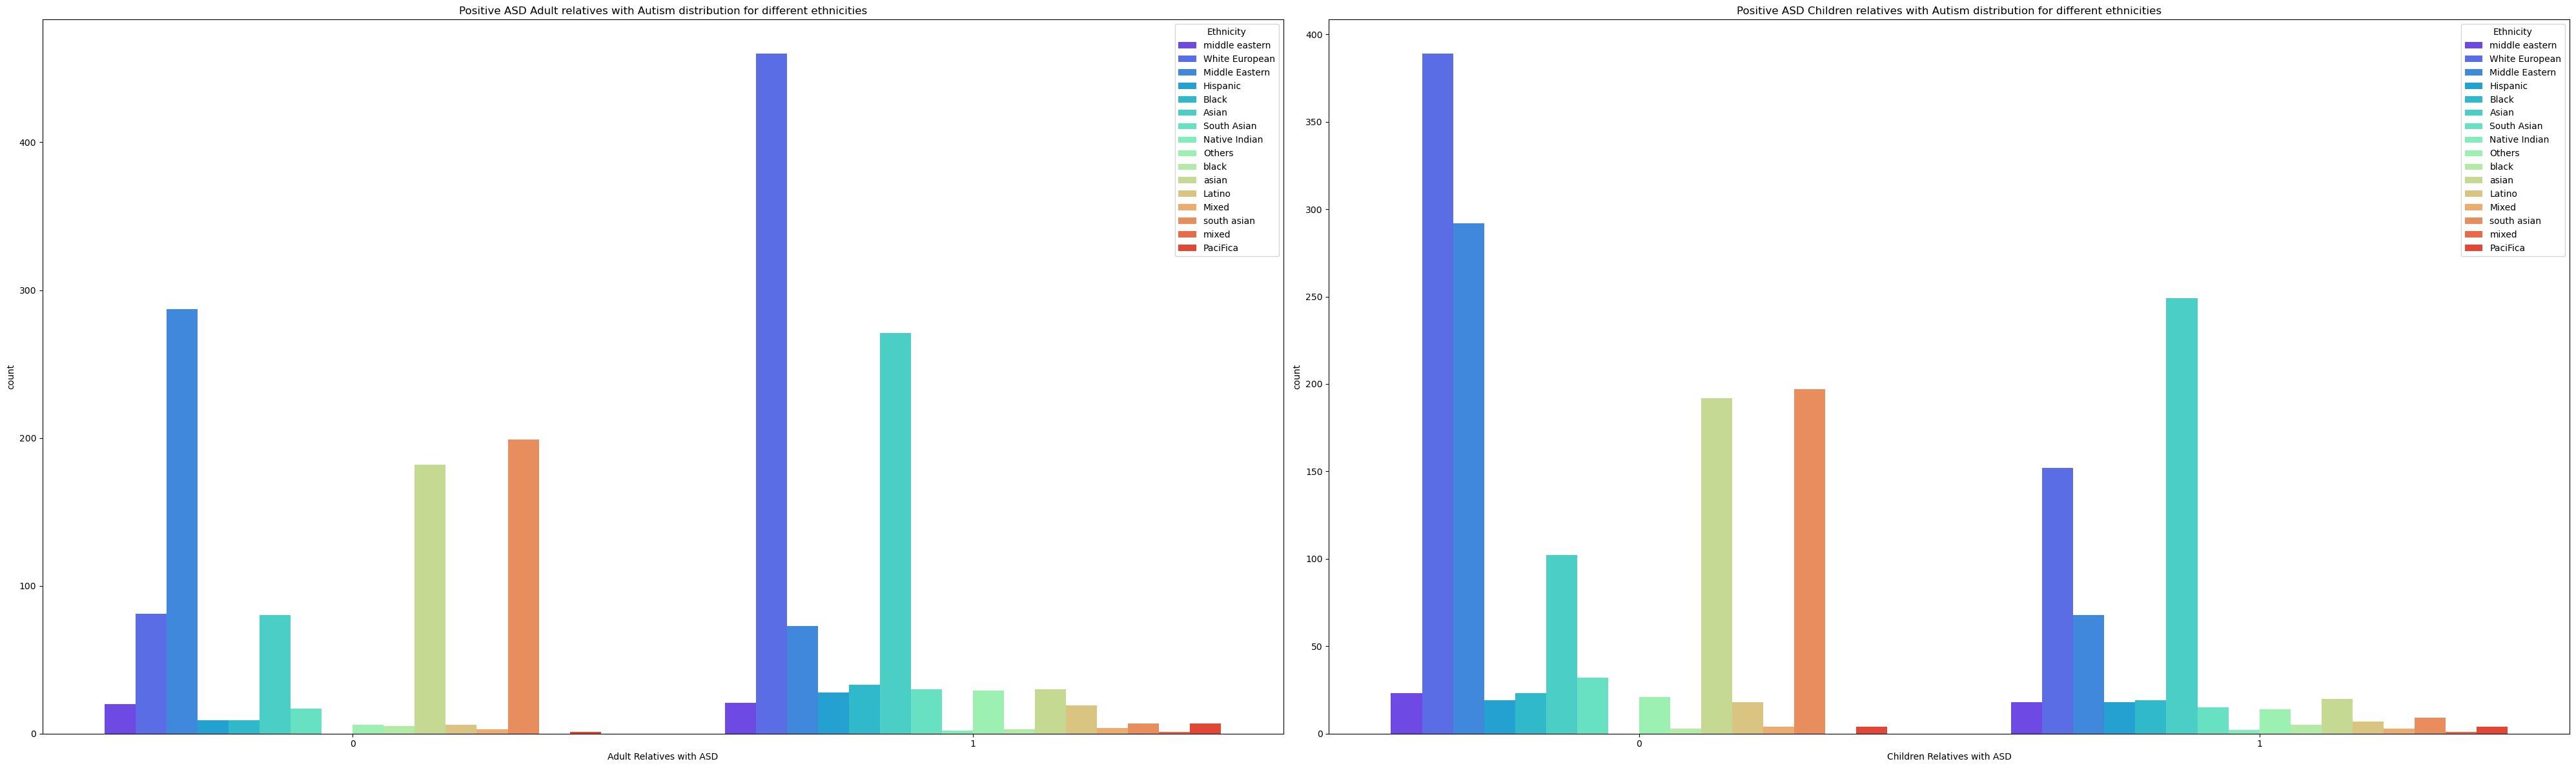

In [13]:
#Lets visualize the distribution of autism in family within different ethnicity
fig, ax = plt.subplots(1,2,figsize=(40,12))
sns.countplot(x='ASD_traits',data=df,hue='Ethnicity',palette='rainbow',ax=ax[0])
ax[0].set_title('Positive ASD Adult relatives with Autism distribution for different ethnicities')
ax[0].set_xlabel('Adult Relatives with ASD')
sns.countplot(x='Family_mem_with_ASD',data=df,hue='Ethnicity',palette='rainbow',ax=ax[1])
ax[1].set_title('Positive ASD Children relatives with Autism distribution for different ethnicities')
ax[1].set_xlabel('Children Relatives with ASD')
plt.tight_layout()


<Axes: xlabel='ASD_traits', ylabel='count'>

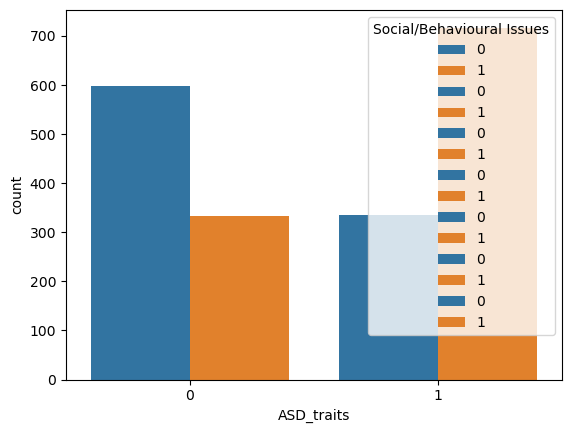

In [14]:
sns.countplot(x='ASD_traits',hue="Anxiety_disorder",data=df)
sns.countplot(x='ASD_traits',hue="Speech Delay/Language Disorder",data=df)
sns.countplot(x='ASD_traits',hue="Learning disorder",data=df)
sns.countplot(x='ASD_traits',hue="Genetic_Disorders",data=df)
sns.countplot(x='ASD_traits',hue="Depression",data=df)
sns.countplot(x='ASD_traits',hue="Global developmental delay/intellectual disability",data=df)
sns.countplot(x='ASD_traits',hue="Social/Behavioural Issues",data=df)


In [15]:

del df['Who_completed_the_test']
del df['Ethnicity']
del df["CASE_NO_PATIENT'S"]



Text(0.5, 0, 'Jaundice while birth')

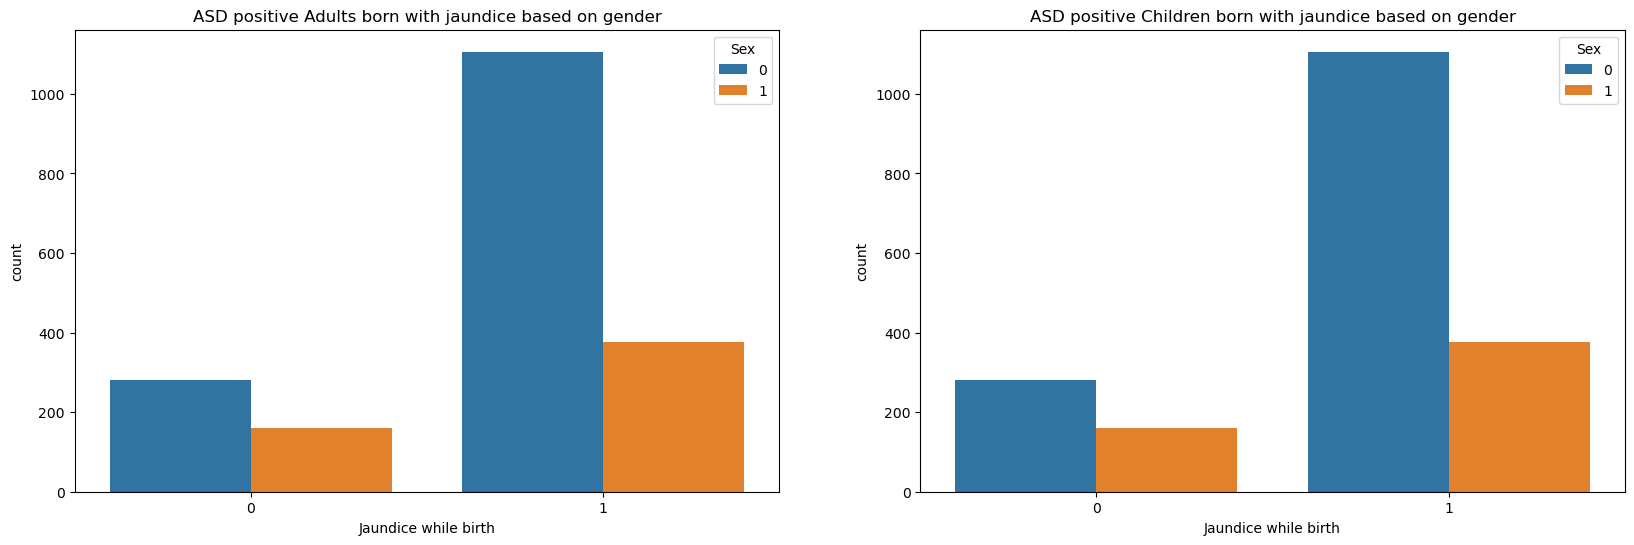

In [16]:
#Let's visualize the jaundice born child based on gender
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.countplot(x='Jaundice',data=df,hue='Sex',ax=ax[0])
ax[0].set_title('ASD positive Adults born with jaundice based on gender')
ax[0].set_xlabel('Jaundice while birth')
sns.countplot(x='Jaundice',data=df,hue='Sex',ax=ax[1])
ax[1].set_title('ASD positive Children born with jaundice based on gender')
ax[1].set_xlabel('Jaundice while birth')



Text(0.5, 1.0, 'Age distribution of ASD positive')

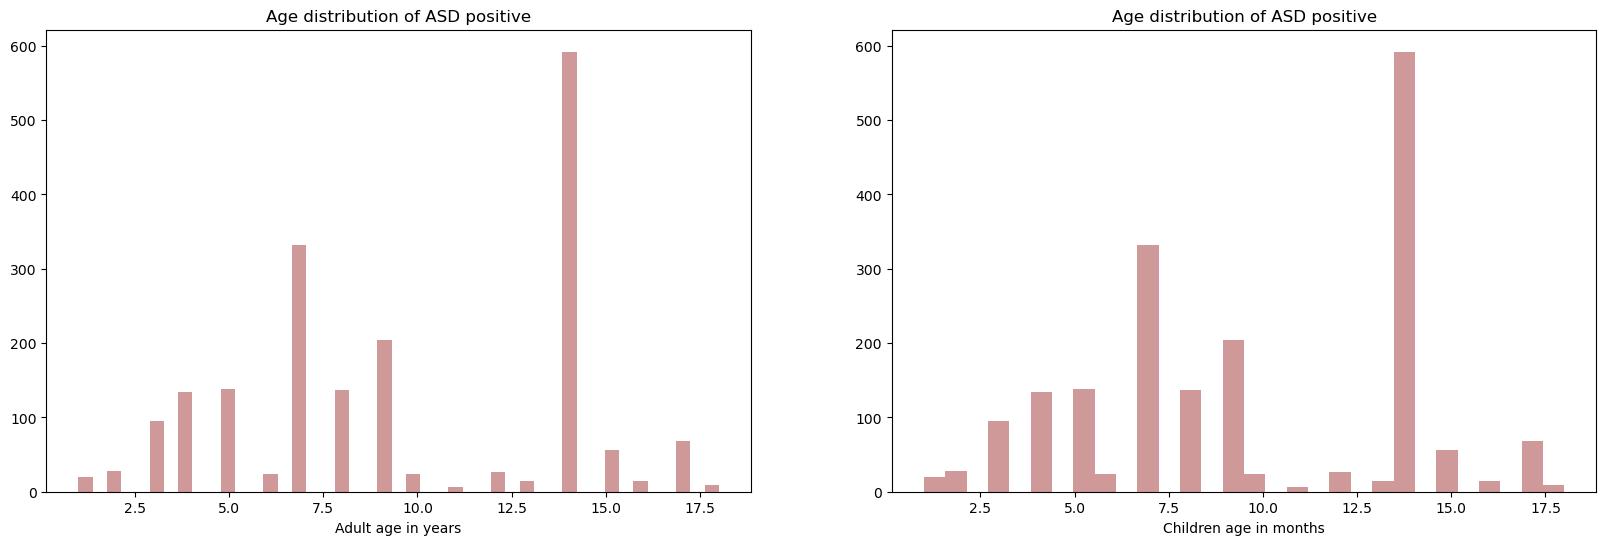

In [17]:
#Let's see the age distribution of ASD positive
fig, ax = plt.subplots(1,2,figsize=(20,6))
sns.distplot(df['Age_Years'],kde=False,bins=45,color='darkred',ax=ax[0])
ax[0].set_xlabel('Adult age in years')
ax[0].set_title('Age distribution of ASD positive')
sns.distplot(df['Age_Years'],kde=False,bins=30,color='darkred',ax=ax[1])
ax[1].set_xlabel('Children age in months')
ax[1].set_title('Age distribution of ASD positive')

In [18]:

X_train = df.drop(['ASD_traits'], axis=1)
Y_train = df['ASD_traits']

rfc = RandomForestClassifier()

rfe = RFE(rfc, n_features_to_select=24)
rfe = rfe.fit(X_train, Y_train)

feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X_train.columns)]
selected_features = [v for i, v in feature_map if i==True]

selected_features


X_train = X_train[selected_features]



x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, train_size=0.70, random_state=2)



In [19]:
lg_model = LogisticRegression(random_state = 42)
lg_model.fit(x_train, y_train)


lg_train, lg_test = lg_model.score(x_train , y_train), lg_model.score(x_test , y_test)

print(f"Training Score: {lg_train}")
print(f"Test Score: {lg_test}")



Training Score: 0.9212481426448736
Test Score: 0.8838821490467937


In [20]:
from sklearn import svm
SVM = svm.LinearSVC()
SVM.fit(x_train , y_train)
SVM.score(x_train , y_train)


0.9264487369985142

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(x_train , y_train)
RFacc = RF.score(x_train , y_train)

NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(x_train , y_train)
NNacc = NN.score(x_train , y_train)



In [22]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
round(model.score(x_train, y_train), 4)

y_pred = model.predict([[1,1,0,1,1,1,1,1,1,1,3.0,2,9.0,1,1,0,1,1,1,1,1,1,0,0]])
print(y_pred)

y_pred = model.predict([[0,0,0,0,0,0,0,0,0,0,10.0,14,0.0,1,1,1,1,1,1,1,1,0,1,1]])
print(y_pred)


[1.]
[0.]


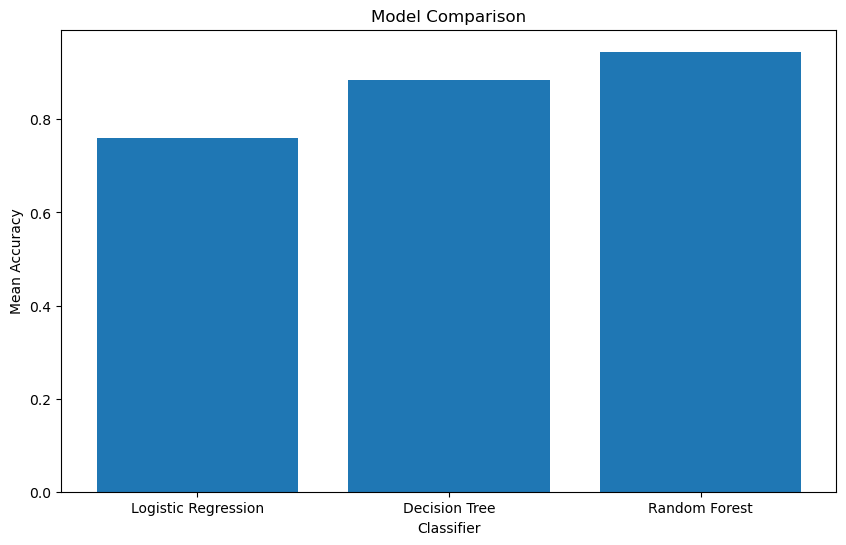

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Cross-validate each classifier and store the results
results = {}
for name, clf in classifiers.items():
    scores = cross_val_score(clf, X_train, Y_train, cv=5)
    results[name] = scores.mean()  # Take the mean accuracy

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.title('Model Comparison')
plt.xlabel('Classifier')
plt.ylabel('Mean Accuracy')
plt.show()




import pickle
file=open('my_model.pkl','wb')
pickle.dump(model,file,protocol=3)


import pickle
file = open("test.pkl","wb")
pickle.dump(model, file)
file.close()
